# Plotly ile COVID-19 Analizi

# İçindekiler

* COVID-19
* Plotly
* Plotly's Python graphing library
* Analiz tanıtımı
* Kütüphaneler
* Dosya okuma ve İlk bakış
    * İncelemem sırasında sıkıntı yaratıcak sütun isimleri keşfettim.
    * İşimize yarıyacak sütunlardan oluşan yeni bir DataFrame
    * Kaç tane eyaletimiz varmış öğrenelim.
    * Eyaletlerimizi benzersiz şekilde listeliyelim.
    * Boş Confirmed, Deaths ve Confirmed_Deaths_rate değerlerini doldurmak:
    * Verimizi Ölüm oranına göre short edelim
* Plotly ile COVID-19 Analizi 1 : Multiple Subplots
    * Sıralamayı değiştirmek ve yeni görsel
* Plotly ile COVID-19 Analizi 2 : WordCloud
    * Object değerleri floata'a çevirmek
    * WordCloud kütüphanesini import edelim
* Plotly ile COVID-19 Analizi 3 : Scatter Plot Matrix
* Plotly ile COVID-19 Analizi 4 : 3D Scatter Plot
* Plotly ile COVID-19 Analizi 5 : Pie Charts
* Plotly ile COVID-19 Analizi 6 : Yakında...

# COVID-19

Yeni Koronavirüs Hastalığı (COVID-19), ilk olarak Çin’in Vuhan Eyaleti’nde Aralık ayının sonlarında solunum yolu belirtileri (ateş, öksürük, nefes darlığı) gelişen bir grup hastada yapılan araştırmalar sonucunda 13 Ocak 2020’de tanımlanan bir virüstür.

Salgın başlangıçta bu bölgedeki deniz ürünleri ve hayvan pazarında bulunanlarda tespit edilmiştir. Daha sonra insandan insana bulaşarak Vuhan başta olmak üzere Hubei eyaletindeki diğer şehirlere ve Çin Halk Cumhuriyeti’nin diğer eyaletlerine ve diğer dünya ülkelerine yayılmıştır.

Koronavirüsler, hayvanlarda veya insanlarda hastalığa neden olabilecek büyük bir virüs ailesidir. İnsanlarda, birkaç koronavirüsün soğuk algınlığından Orta Doğu Solunum Sendromu (MERS) ve Şiddetli Akut Solunum Sendromu (SARS) gibi daha şiddetli hastalıklara kadar solunum yolu enfeksiyonlarına neden olduğu bilinmektedir. Yeni Koronavirüs Hastalığına SAR-CoV-2 virüsü neden olur.

https://covid19bilgi.saglik.gov.tr/tr/covid-19-yeni-koronavirus-hastaligi-nedir

# Plotly

İngilizceden çevrilmiştir-Plotly, merkezi Montreal, Quebec'te bulunan ve çevrimiçi veri analizi ve görselleştirme araçları geliştiren teknik bir bilgi işlem şirketidir.

https://g.co/kgs/z5oGZn

## Plotly's Python graphing library 

İngilizceden çevrilmiştir-
Plotly'nin Python grafik kütüphanesi etkileşimli, yayın kalitesinde grafikler yapar. Çizgi grafikleri, saçılma grafikleri, alan grafikleri, çubuk grafikler, hata çubukları, kutu grafikleri, histogramlar, ısı haritaları, alt grafikler, çoklu eksenler, kutup grafikleri ve kabarcık grafikleri oluşturma örnekleri.

https://plotly.com/python/

# Analizler 


1 - Onaylanmış hasta sayısı, ölüm sayısı ve ölüm oranlarını, şehirin ölüm oranlarını baz alarak grafikte sıralamak.  (Multiple Subplots)

2 - En çok hastanın olduğu  40 şehirin, ölüm oranınına göre şehir ismini ekrana basmak (WordCloud)

3 - Onaylanmış hasta sayısı, ölüm sayısı ve ölüm oranları arasındaki korelasyonu incelemek (Scatter Matrix)

4 - Onaylanmış hasta sayısı, ölüm sayısı ve ölüm oranlarını 3 boyutlu görsellede incelemek (3D Scatter Plot)

5 - En çok hasta barındıran 15 şehirin ölüm oranlarına yüzdelik şekilde bakmak (Pie Charts)


# Kütüphaneler

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


# Dosya okuma ve İlk bakış

In [17]:
covid_19 = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")

In [18]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27618 entries, 0 to 27617
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              27618 non-null  int64  
 1   ObservationDate  27618 non-null  object 
 2   Province/State   13431 non-null  object 
 3   Country/Region   27618 non-null  object 
 4   Last Update      27618 non-null  object 
 5   Confirmed        27618 non-null  float64
 6   Deaths           27618 non-null  float64
 7   Recovered        27618 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.7+ MB


In [19]:
covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [20]:
covid_19.corr() # 0.881778 -> Confirmed ve Deaths arası ilişki

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,0.188311,0.141398,0.137576
Confirmed,0.188311,1.000000,0.879588,0.515229
Deaths,0.141398,0.879588,1.000000,0.428835
Recovered,0.137576,0.515229,0.428835,1.000000


In [21]:
covid_19.describe()

,SNo,Confirmed,Deaths,Recovered
count,27618.000000,27618.000000,27618.000000,27618.000000
mean,13809.500000,5869.837208,385.054095,1824.770331
std,7972.774204,23778.742157,2239.667632,11300.781800
min,1.000000,0.000000,0.000000,0.000000
25%,6905.250000,18.000000,0.000000,0.000000
50%,13809.500000,210.000000,3.000000,8.000000
75%,20713.750000,1446.750000,32.000000,207.000000
max,27618.000000,356458.000000,36042.000000,298418.000000


In [22]:
covid_19.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,27618.0,13809.500000,7972.774204,1.0,6905.25,13809.5,20713.75,27618.0
Confirmed,27618.0,5869.837208,23778.742157,0.0,18.00,210.0,1446.75,356458.0
Deaths,27618.0,385.054095,2239.667632,0.0,0.00,3.0,32.00,36042.0
Recovered,27618.0,1824.770331,11300.781800,0.0,0.00,8.0,207.00,298418.0


## İncelemem sırasında sıkıntı yaratıcak sütun isimleri keşfettim.

Province/State ve Country/Region ----> / işaretini _ işareti ile değiştirelim

In [23]:
covid_19_columns_v2 = ['sNo','ObservationDate','Province_State','Country_Region','Last Update',"Confirmed","Deaths","Recovered"]
covid_19.columns = covid_19_columns_v2
covid_19.head()

,sNo,ObservationDate,Province_State,Country_Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## İşimize yarıyacak sütunlardan oluşan yeni bir DataFrame

In [24]:
covid_19_plotly = pd.DataFrame({"Province_State":covid_19.Province_State,
                                "Confirmed": covid_19.Confirmed,
                                "Deaths": covid_19.Deaths
    })                                              

In [25]:
covid_19_plotly.head()

,Province_State,Confirmed,Deaths
0,Anhui,1.0,0.0
1,Beijing,14.0,0.0
2,Chongqing,6.0,0.0
3,Fujian,1.0,0.0
4,Gansu,0.0,0.0


## Kaç tane eyaletimiz varmış öğrenelim.

In [26]:
len(covid_19["Province_State"].unique())

430

## 430 adet şehir/eyalet' imiz olmasına rağmen 27165 adet satırımız var. Demek ki her bir eyalet 10 larca defa kullanıldı. Gelin Eyaletlerimizi benzersiz şekilde listeliyelim.

In [59]:
plotly_data = covid_19_plotly.groupby("Province_State").sum() 
plotly_data = plotly_data.reset_index() 
plotly_data["Confirmed_Deaths_rate"] = plotly_data["Deaths"] / plotly_data["Confirmed"]
plotly_data[0:10]

,Province_State,Confirmed,Deaths,Confirmed_Deaths_rate
0,"Montreal, QC",17.0,0.0,0.000000
1,"Norfolk County, MA",7.0,0.0,0.000000
2,Abruzzo,25455.0,3085.0,0.121194
3,Acre,5920.0,154.0,0.026014
4,Aguascalientes,1144.0,42.0,0.036713
5,Alabama,343891.0,12673.0,0.036852
6,Alagoas,9353.0,513.0,0.054849
7,"Alameda County, CA",6.0,0.0,0.000000
8,Alaska,16977.0,448.0,0.026389
9,Alberta,213140.0,3894.0,0.018270


## Verimizi Ölüm oranına göre short edelim

In [28]:


# asceding : azalan sıralama
new_index = (plotly_data["Confirmed_Deaths_rate"].sort_values(ascending=False)).index.values

# indexleri değiştir
sorted_data = plotly_data.reindex(new_index)

In [29]:
# sorted_data

# Plotly ile COVID-19 Analizi 1 : Multiple Subplots

In [30]:
# go.Scatter ile tracelerimizin oluşturulması

trace1 = go.Scatter(
    x=sorted_data[:40].Province_State,
    y=sorted_data[:40].Confirmed_Deaths_rate,
    # Domain oluşturmamıza gerek yok ilki için
    name = "Confirmed_Deaths_rate"
)
trace2 = go.Scatter(
    y=sorted_data[:40].Confirmed,
    xaxis='x2', # x domain, farklı bir alanda grafik oluşucağı için
    yaxis='y2', # y domain
    name = "Confirmed"
)
trace3 = go.Scatter(
    y=sorted_data[:40].Deaths,
    xaxis='x3',
    yaxis='y3',
    name = "Deaths"
)

In [31]:
data = [trace1, trace2, trace3] # tracelerimiz data listetesinde birleşti


In [32]:
# Görselleştirme stringleri

layout = go.Layout(
    xaxis=dict(
        domain=[0, 1] # Hangisi nereye gelicek konum
    ),
    yaxis=dict(
        domain=[0, 1]
    ),
    xaxis2=dict(
        domain=[0, 1]
    ),
    xaxis3=dict(
        domain=[0, 1],
        
    ),
    yaxis1=dict(
        domain=[0, 0.33],
        
    ),
    yaxis2=dict(
        domain=[0.33, 0.66],
        
    ),
    yaxis3=dict(
        domain=[0.66, 1]
    ),
    title = 'Plotly ile COVID-19 Analizi'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Sıralamayı değiştirmek
İncemelerimize göre birçok şehir/eyalet 5-100 hasta arasında ve bu durum bizim için çok verimli değil. Bizim için 1000 hasta sayısından az olan tüm eyaletler pasif olmalı.

In [33]:


# asceding : azalan sıralama
new_index = (plotly_data["Confirmed"].sort_values(ascending=False)).index.values

# indexleri değiştir
sorted_data2 = plotly_data.reindex(new_index)

sorted_data2.head()

,Province_State,Confirmed,Deaths,Confirmed_Deaths_rate
250,New York,13781674.0,969736.0,0.070364
159,Hubei,6906695.0,349619.0,0.050620
247,New Jersey,5188331.0,300329.0,0.057885
214,Massachusetts,2652916.0,148138.0,0.055840
164,Illinois,2514328.0,106800.0,0.042477


In [34]:
sorted_data2 =sorted_data2[:40]
sorted_data2.head()

,Province_State,Confirmed,Deaths,Confirmed_Deaths_rate
250,New York,13781674.0,969736.0,0.070364
159,Hubei,6906695.0,349619.0,0.050620
247,New Jersey,5188331.0,300329.0,0.057885
214,Massachusetts,2652916.0,148138.0,0.055840
164,Illinois,2514328.0,106800.0,0.042477


In [35]:
# asceding : azalan sıralama
new_index = (sorted_data2["Confirmed_Deaths_rate"].sort_values(ascending=False)).index.values

# indexleri değiştir
sorted_data3 = sorted_data2.reindex(new_index)

sorted_data3.head()

,Province_State,Confirmed,Deaths,Confirmed_Deaths_rate
193,Lombardia,679667.0,124205.0,0.182744
202,Madrid,530972.0,70840.0,0.133416
287,Piemonte,236806.0,29027.0,0.122577
62,Catalonia,445838.0,47514.0,0.106572
223,Michigan,1861868.0,155934.0,0.083751


In [36]:
# go.Scatter ile tracelerimizin oluşturulması

trace1 = go.Scatter(
    x=sorted_data3[:20].Province_State,
    y=sorted_data3[:20].Confirmed_Deaths_rate,
    # Domain oluşturmamıza gerek yok ilki için
    name = "Confirmed_Deaths_rate"
)
trace2 = go.Scatter(
    y=sorted_data3[:40].Confirmed,
    xaxis='x2', # x domain, farklı bir alanda grafik oluşucağı için
    yaxis='y2', # y domain
    name = "Confirmed"
)
trace3 = go.Scatter(
    y=sorted_data3[:40].Deaths,
    xaxis='x3',
    yaxis='y3',
    name = "Deaths"
)

In [37]:
data = [trace1, trace2, trace3] # tracelerimiz data listetesinde birleşti


In [38]:
# Görselleştirme stringleri

layout = go.Layout(
    xaxis=dict(
        domain=[0, 1] # Hangisi nereye gelicek konum
    ),
    yaxis=dict(
        domain=[0, 1]
    ),
    xaxis2=dict(
        domain=[0, 1]
    ),
    xaxis3=dict(
        domain=[0, 1],
        
    ),
    yaxis1=dict(
        domain=[0, 0.33],
        
    ),
    yaxis2=dict(
        domain=[0.33, 0.66],
        
    ),
    yaxis3=dict(
        domain=[0.66, 1]
    ),
    title = 'Plotly ile COVID-19 Analizi'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Plotly ile COVİD-19 Analizi 2 : WordCloud

## Veriyi inceliyelim

In [39]:
sorted_data3.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 193 to 373
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Province_State         40 non-null     object 
 1   Confirmed              40 non-null     float64
 2   Deaths                 40 non-null     float64
 3   Confirmed_Deaths_rate  40 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB


## Deaths ve Confirmed değerlerimizi integer değerlere çevirelim

In [40]:
sorted_data3.Confirmed_Deaths_rate = sorted_data3.Confirmed_Deaths_rate.astype("float")
sorted_data3.Deaths = sorted_data3.Deaths.astype("float")

sorted_data3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 193 to 373
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Province_State         40 non-null     object 
 1   Confirmed              40 non-null     float64
 2   Deaths                 40 non-null     float64
 3   Confirmed_Deaths_rate  40 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB


## WordCloud kütüphanesini import edelim

In [41]:
from wordcloud import WordCloud

## Sort edilmiş 3. Versiyon datamızın (sorted_data3) ilk 40 değerinin şehirlerini baz alarak görselleştirelim

(-0.5, 511.5, 383.5, -0.5)

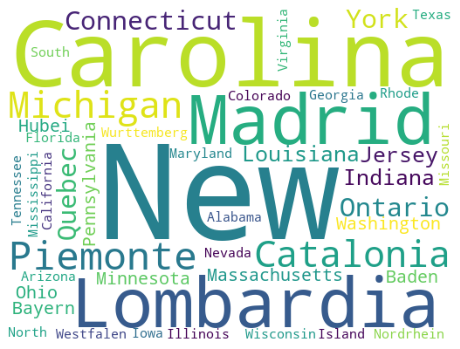

In [42]:
plt.subplots(figsize=(8,8))

wordcloud = WordCloud(
    
    background_color = "white", # arkaplan rengi
    width = 512, #genişlik
    height = 384, #yükseklik
).generate(" ".join(sorted_data3[:40].Province_State))   # kullanılan kelimeleri ayır ve ona göre çok olanları daha büyük şekilde bastır

plt.imshow(wordcloud)
plt.axis("off") # x ve y eksenlerini kapa


# Plotly ile COVID-19 Analizi 3 : Scatter Plot Matrix

In [43]:
import plotly.figure_factory as ff 

In [44]:
# Data

dataframe = sorted_data3[:30] # veriyi filitreliyoruz 
data = dataframe.loc[:,["Confirmed","Deaths", "Confirmed_Deaths_rate"]] # karşılaştırmak istediğimiz featuresler
data["index"] = np.arange(1,len(data)+1) # datafremin indexine eşitliyor ve ekliyoruz.
data.head()

,Confirmed,Deaths,Confirmed_Deaths_rate,index
193,679667.0,124205.0,0.182744,1
202,530972.0,70840.0,0.133416,2
287,236806.0,29027.0,0.122577,3
62,445838.0,47514.0,0.106572,4
223,1861868.0,155934.0,0.083751,5


In [45]:
# Scatter Matrix

fig = ff.create_scatterplotmatrix(data, # verimiz
                                  diag='box', #orta (-x) ekseni
                                  index='index', # index olarak yeni belirlediğim index
                                  colormap='Portland', # renk paleti
                                  
                                  text = sorted_data3.Province_State,
                                  colormap_type='cat', 
                                  height=700, width=700) # boyutlandırma
iplot(fig)

# Plotly ile COVID-19 Analizi 4 :

In [46]:
sorted_data.head()

,Province_State,Confirmed,Deaths,Confirmed_Deaths_rate
335,"Santa Rosa County, FL",5.0,2.0,0.400000
190,"Lee County, FL",6.0,2.0,0.333333
183,"King County, WA",412.0,91.0,0.220874
290,"Placer County, CA",28.0,6.0,0.214286
74,Chihuahua,2107.0,432.0,0.205031


In [47]:
# 3 Boyutun her birini trace 1 de gösterebiliriz.

trace1 = go.Scatter3d( # go kütüphanesinden scatter3d yi çağırdık
    
    x=sorted_data[:40].Confirmed_Deaths_rate, # x ekseni değerlerimiz
    y=sorted_data[:40].Confirmed, # y ekseni değerlerimiz
    z=sorted_data[:40].Deaths, # z ekseni değerlerimiz
    
    text =  sorted_data.Province_State,
    mode='markers', # noktalı yapıda olsun
    marker=dict( # sözlük yapısında boyu ve rengimizi ayarladık
        size=10,
        color='rgb(255,0,0)',                 
    )
)

data = [trace1] # tek bir tracemizi listeledik


layout = go.Layout( # go kütüphanesinden Layout methodu ile
    margin=dict( # kenarlardan bırakılan paylar 0
        l=0,
        r=0,
        b=0,
        t=0  
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Plotly ile COVID-19 Analizi 5: Pie Charts

In [48]:
labels = sorted_data3.Province_State

# figure

fig = {
    
  "data": [
    { # Trace 
      "values": sorted_data3[:15].Confirmed_Deaths_rate, # değerler
      "labels": labels,    
      "domain": {"x": [0, .5]}, 
      "name": "Şehir/eyalet",
      "hoverinfo":"label+percent+name",
      "hole": .3, # orta yuvarlak çapı
      "type": "pie" #tip
    },], 
    
  
  # Görselleştirmenin düzeni
  "layout": {
        "title":"En çok hastası olan şehirlerin ölüm oranı",
        "annotations": [
            { "font": { "size": 20}, #boyutlar
              "showarrow": False,
              "text": "Ölüm Oranı", 
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)